In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("E:/Projects/Learning/ML/Housing Prices Prediction/train.csv")
test_df = pd.read_csv("E:/Projects/Learning/ML/Housing Prices Prediction/test.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(train_df.shape, test_df.shape)

(1460, 81) (1459, 80)


In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

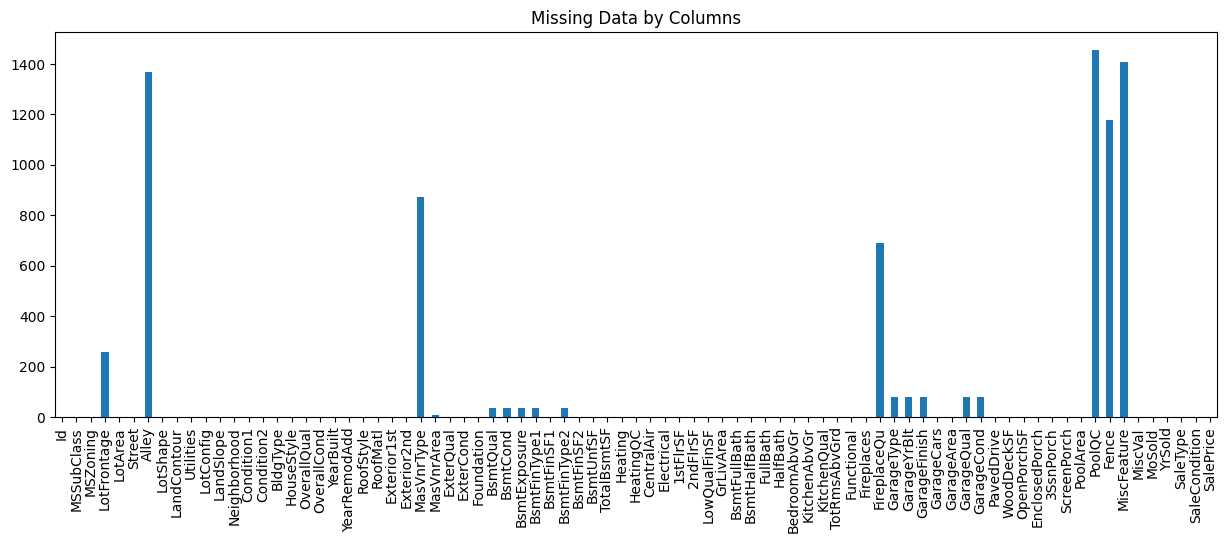

In [5]:
train_df.isna().sum().plot(kind='bar', figsize=(15, 5), title="Missing Data by Columns")
plt.show()

In [ ]:
numerical_features = []
for col in train_df.columns:
    if train_df[col].dtype in ['int64', 'float64']:
        numerical_features.append(col)

numerical_df = train_df[numerical_features[1:]].copy()

numerical_df.isna().sum().plot(kind='bar', figsize=(15, 5), title="Missing Data by Columns")
plt.show()

In [ ]:
# lotfrontage_mean = numerical_df['LotFrontage'].mean()
# numerical_df['LotFrontage'].fillna(lotfrontage_mean, inplace=True)
numerical_df.dropna(axis=0, inplace=True)
numerical_df.reset_index(drop=True, inplace=True)

X = numerical_df[numerical_features[1:-1]]
y = numerical_df[numerical_features[-1]]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size=0.1)

from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(train_X, train_y)

predictions = linear_reg_model.predict(val_X)
mean_absolute_error(predictions, val_y)

In [23]:
def get_mae(max_depth, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=200, max_depth=max_depth, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(preds_val, val_y)
    return mae

def get_rmse(max_depth, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=200, max_depth=max_depth, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    rmse = np.sqrt(mean_squared_error(preds_val, val_y))
    return rmse

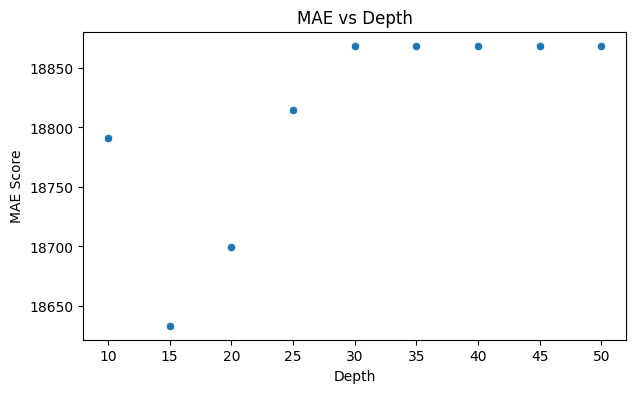

In [21]:
mae_by_depth = {}
for max_depth in range(10, 51, 5):
    mae_by_depth[max_depth] = get_mae(max_depth, train_X, val_X, train_y, val_y)

plt.figure(figsize=(7, 4))
sns.scatterplot(x=mae_by_depth.keys(), y=mae_by_depth.values())
plt.title('MAE vs Depth')
plt.xlabel("Depth")
plt.ylabel("MAE Score")
plt.show()

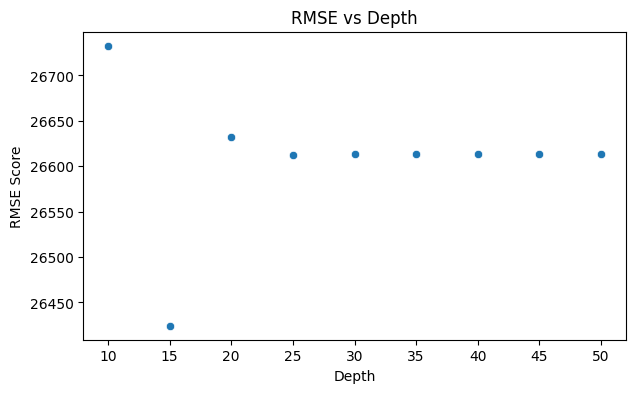

In [22]:
rmse_by_depth = {}
for max_depth in range(10, 51, 5):
    rmse_by_depth[max_depth] = get_rmse(max_depth, train_X, val_X, train_y, val_y)

plt.figure(figsize=(7, 4))
sns.scatterplot(x=rmse_by_depth.keys(), y=rmse_by_depth.values())
plt.title('RMSE vs Depth')
plt.xlabel("Depth")
plt.ylabel("RMSE Score")
plt.show()

In [19]:
# ?RandomForestRegressor